# Practice Notebook: Learning SimpleITK

Import the SimpleITK module

In [1]:
import SimpleITK as sitk

Read the image in its native format (nii.gz)

In [2]:
image = sitk.ReadImage( '/local-scratch/cedar-rm/scratch/asa224/Datasets/BRATS2017/MICCAI_BraTS17_Data_Training/HGG/Brats17_2013_10_1/Brats17_2013_10_1_t1.nii.gz' )

Get some of the properties of the scan

In [3]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())
print(image.GetNumberOfComponentsPerPixel())

(240, 240, 155)
(0.0, -239.0, 0.0)
(1.0, 1.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1


In [4]:
print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

240
240
155


In [5]:
print(image.GetDimension())
print(image.GetPixelIDValue())
print(image.GetPixelIDTypeAsString())

3
2
16-bit signed integer


Convert the SITK Image object into a simple numpy array for processing and viewing

In [6]:
nda = sitk.GetArrayViewFromImage(image)

In ITK, images are (x,y,z), but in Numpy, they are (z,y,x). 

In [8]:
nda.shape

(155, 240, 240)

This should open up ImageJ, but it doesn't at the moment. Need to fix this. 

In [9]:
sitk.Show(image, debugOn=True)

View the opened volume using matplotlib

In [10]:
import matplotlib.pyplot as plt

In [11]:
npa = sitk.GetArrayViewFromImage(image)

# Display the image slice from the middle of the stack, z axis
z = int(image.GetDepth()/2)
npa_zslice = sitk.GetArrayViewFromImage(image)[z,:,:]

# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure()
fig.set_size_inches(15,30)

fig.add_subplot(1,3,1)
plt.imshow(npa_zslice)
plt.title('default colormap')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r);
plt.title('grey colormap')
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('grey colormap,\n scaling based on volumetric min and max values')
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())
plt.axis('off');

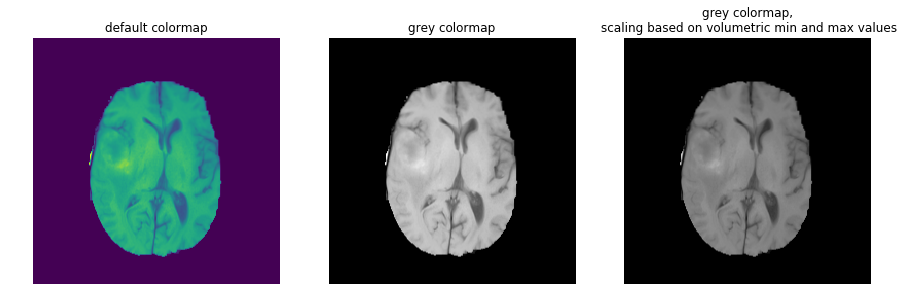

In [12]:
plt.show()

In [43]:
def showMPL(img):
    if img.GetDimension() > 2:
        print('3D Image detected, showing only the middle slice..')
        z = int(img.GetDepth()/2)
        nda = sitk.GetArrayViewFromImage(img)[z,:,:]
    else:
        nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda, cmap='gray')
    plt.show()

3D Image detected, showing only the middle slice..


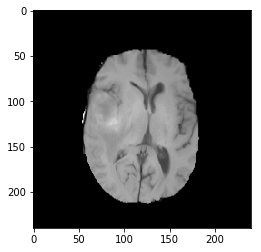

In [44]:
showMPL(image)

Indexing into SimpleITK Image object is easy

In [37]:
image[100,100,100]

462

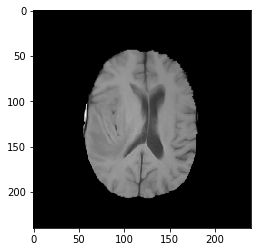

In [42]:
showMPL(image[:,:,90])